In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 6\ Assignment/model.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 6\ Assignment/utils.py /content

In [ ]:
import model
import utils
from model import Net
from utils import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True


In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1407,), (0.4081,)) --> This is incorrect line and hence commented
    transforms.Normalize((0.1307,), (0.3081,))
    ])

See how to get separate validations dataset

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
#test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms) --> Commented the incorrect line. train = False and test_transform needs to be passed
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 142826705.11it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 104337376.25it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38586684.13it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 8927145.63it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
type(train_data), len(train_data), len(train_data[0]), train_data.data.shape, test_data.data.shape

(torchvision.datasets.mnist.MNIST,
 60000,
 2,
 torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]))

In [ ]:
batch_size = 128

#kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True} --> Commented the incorrect line. shuffle parameter needs to be True
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

#test_loader = torch.utils.data.DataLoader(train_data, **kwargs) --> Commented the incorrect line. test_data needs be passed for test_loader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

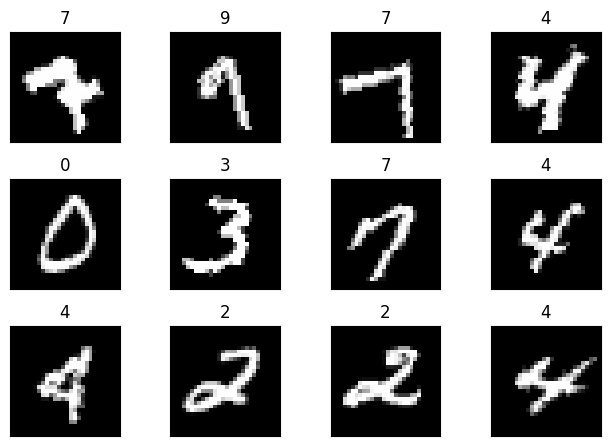

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [ ]:
from tqdm import tqdm

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
              ReLU-2          [-1, 128, 28, 28]               0
       BatchNorm2d-3          [-1, 128, 28, 28]             256
           Dropout-4          [-1, 128, 28, 28]               0
            Conv2d-5            [-1, 8, 30, 30]           1,032
              ReLU-6            [-1, 8, 30, 30]               0
       BatchNorm2d-7            [-1, 8, 30, 30]              16
           Dropout-8            [-1, 8, 30, 30]               0
            Conv2d-9           [-1, 16, 30, 30]           1,168
             ReLU-10           [-1, 16, 30, 30]               0
      BatchNorm2d-11           [-1, 16, 30, 30]              32
          Dropout-12           [-1, 16, 30, 30]               0
        MaxPool2d-13           [-1, 16, 15, 15]               0
           Conv2d-14           [-1, 16,

In [ ]:
model = Net().to(device)
#optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9) -- Commented the line since learning rate needs to be corrected
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  #test(model, device, train_loader) --> Removed this incorrect line. test_loader needs to be passed here
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2389 Batch_id=468 Accuracy=81.62: 100%|██████████| 469/469 [00:39<00:00, 11.92it/s]


Test set: Average loss: 0.1163, Accuracy: 9704/10000 (97.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0471 Batch_id=468 Accuracy=96.51: 100%|██████████| 469/469 [00:28<00:00, 16.33it/s]


Test set: Average loss: 0.0754, Accuracy: 9786/10000 (97.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0212 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:28<00:00, 16.48it/s]


Test set: Average loss: 0.0445, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0512 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:30<00:00, 15.56it/s]


Test set: Average loss: 0.0401, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0374 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]


Test set: Average loss: 0.0289, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0505 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:28<00:00, 16.29it/s]


Test set: Average loss: 0.0327, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0571 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:28<00:00, 16.24it/s]


Test set: Average loss: 0.0295, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0406 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:28<00:00, 16.43it/s]


Test set: Average loss: 0.0289, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0964 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:28<00:00, 16.35it/s]


Test set: Average loss: 0.0256, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0175 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]


Test set: Average loss: 0.0253, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0337 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:27<00:00, 16.83it/s]


Test set: Average loss: 0.0235, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0672 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:28<00:00, 16.42it/s]


Test set: Average loss: 0.0229, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0298 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:28<00:00, 16.40it/s]


Test set: Average loss: 0.0228, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0259 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:28<00:00, 16.46it/s]


Test set: Average loss: 0.0233, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0305 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]


Test set: Average loss: 0.0246, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0749 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:28<00:00, 16.22it/s]


Test set: Average loss: 0.0186, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0200 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:28<00:00, 16.31it/s]


Test set: Average loss: 0.0182, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0370 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:28<00:00, 16.42it/s]


Test set: Average loss: 0.0175, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0988 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:28<00:00, 16.37it/s]


Test set: Average loss: 0.0186, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0185 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]


Test set: Average loss: 0.0176, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

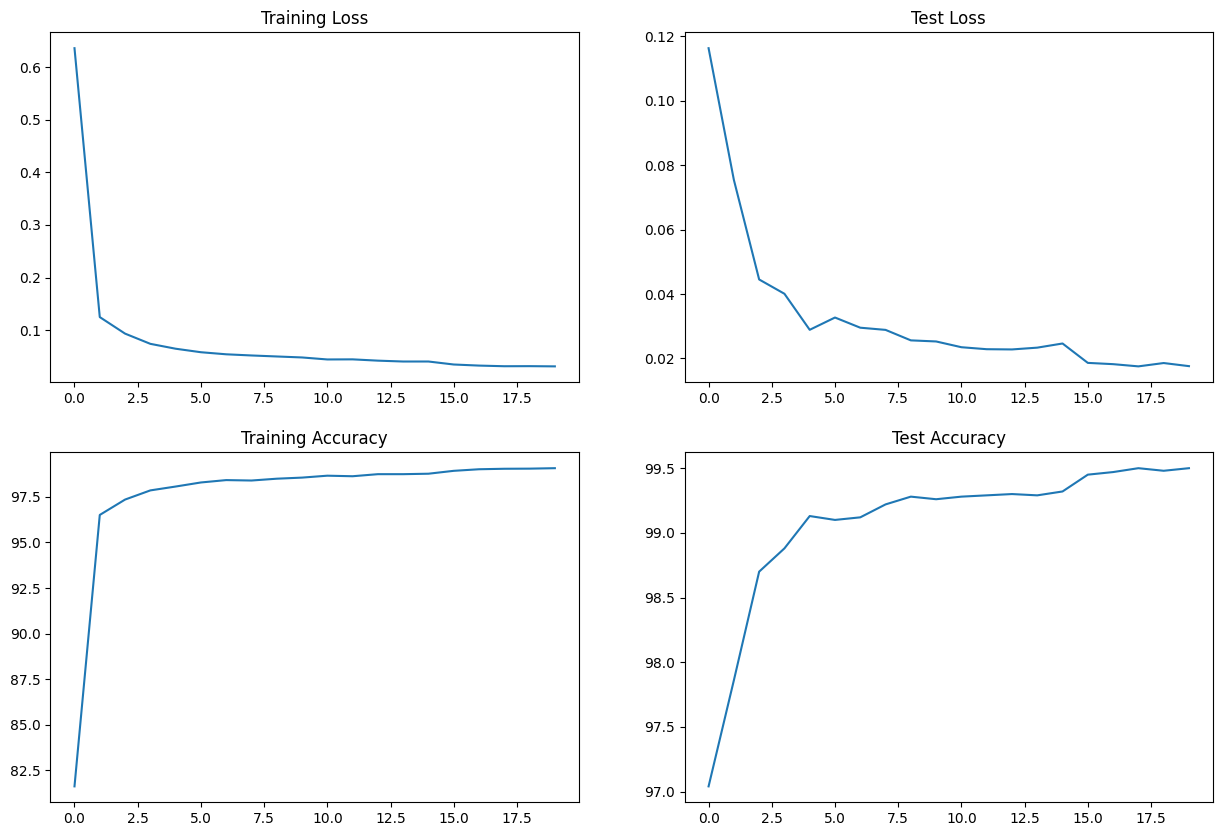

In [ ]:
printTrainTest_LossAcc(train_losses,train_acc,test_losses,test_acc)